# Dreaddit Dataset

## Exploring LIWC and DAL Features for Stress Detection

This Section explores the linguistic features (LIWC) and affective features (DAL) in the Dreaddit dataset to understand how they relate to stress signals in social media text.

### 1. Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


### 2. Load the Dataset

In [20]:
# Load the training dataset
df_train = pd.read_csv('data/dreaddit-train.csv')
df_test = pd.read_csv('data/dreaddit-test.csv')

print(f"Train Dataset shape: {df_train.shape}")
print(f"Test Dataset shape: {df_test.shape}")
print(f"\nTrain Label distribution:")
print(df_train['label'].value_counts())
print(f"\nStress rate: {df_train['label'].mean()*100:.2f}%")
print(f"No Stress rate: {(1-df_train['label'].mean())*100:.2f}%")

Train Dataset shape: (2838, 116)
Test Dataset shape: (715, 116)

Train Label distribution:
label
1    1488
0    1350
Name: count, dtype: int64

Stress rate: 52.43%
No Stress rate: 47.57%


### 3. Dataset Overview

#### 3.1 Basic Information

In [3]:
# Basic information
print("Dataset Info:")
print(df_train.info())

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), str(4)
memory usage: 2.5 MB
None


#### 3.2 Check for missing values 

In [4]:
# Check for missing values
missing = df_train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if len(missing) > 0:
    print("Missing values:")
    print(missing)
else:
    print("No missing values found!")

No missing values found!


#### 3.3 Subreddit post distribution

Posts per subreddit:
subreddit
ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: count, dtype: int64


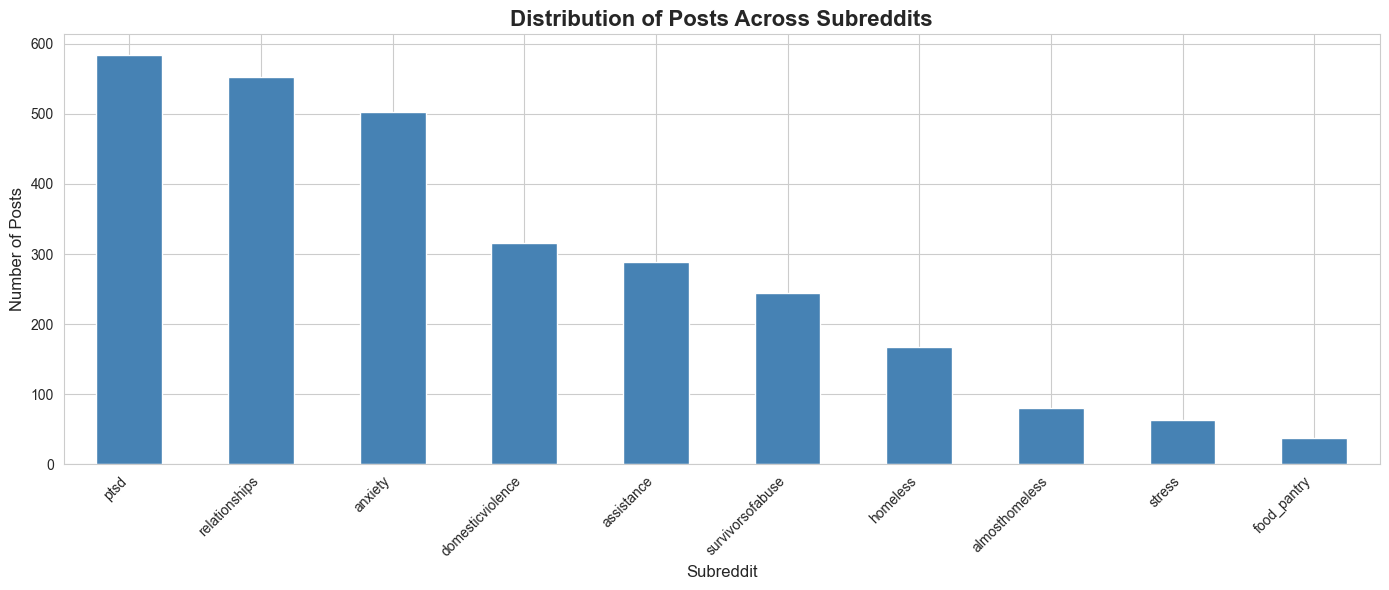

In [5]:
# Subreddit distribution
print("Posts per subreddit:")
print(df_train['subreddit'].value_counts())

# Visualize subreddit distribution
plt.figure(figsize=(14, 6))
df_train['subreddit'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Distribution of Posts Across Subreddits', fontsize=16, fontweight='bold')
plt.xlabel('Subreddit', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 3.4 Stress rate by Subreddit


Stress rate by subreddit:
                  Stress_Rate  Count
subreddit                           
anxiety              0.658052    503
domesticviolence     0.639241    316
almosthomeless       0.587500     80
ptsd                 0.568493    584
stress               0.546875     64
survivorsofabuse     0.457143    245
relationships        0.447464    552
food_pantry          0.378378     37
homeless             0.375000    168
assistance           0.363322    289


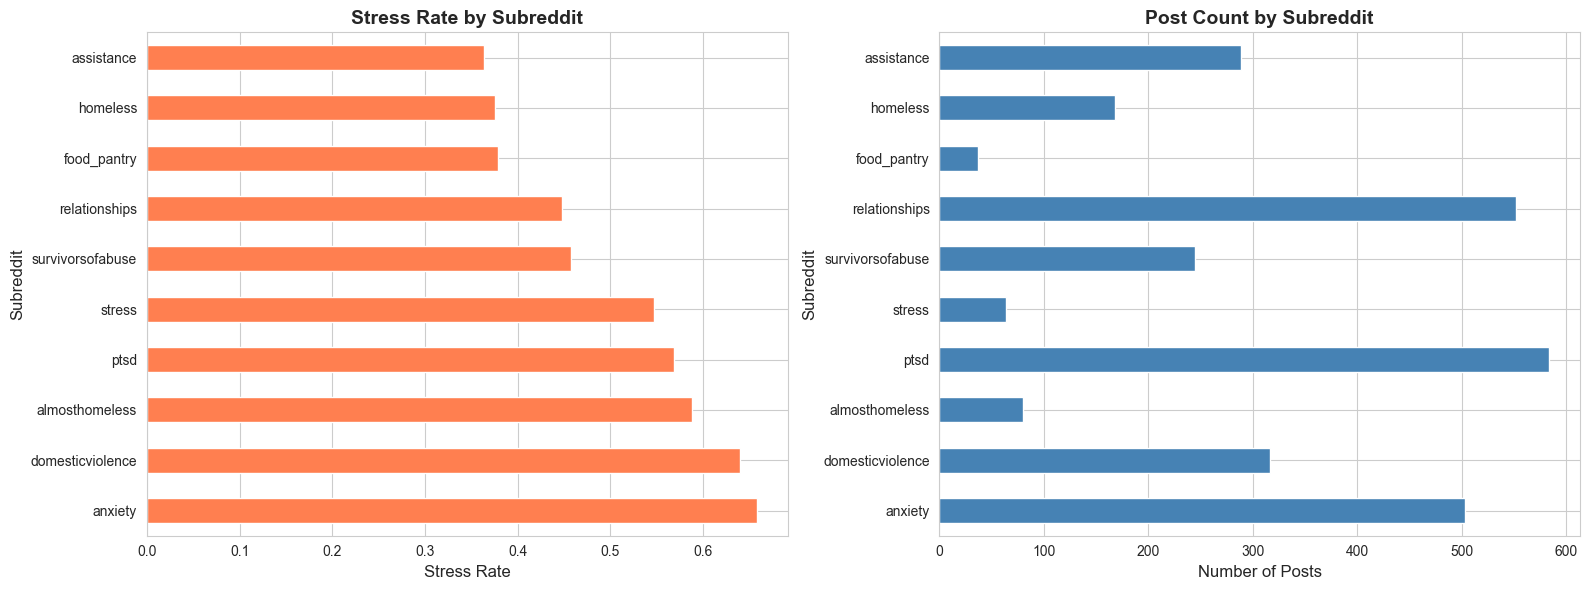

In [ ]:
# Stress labels by subreddit
stress_by_sub = df_train.groupby('subreddit')['label'].agg(['mean', 'count']).sort_values('mean', ascending=False)
stress_by_sub.columns = ['Stress_Rate', 'Count']
print("\nStress rate by subreddit:")
print(stress_by_sub)

# Visualize Stress Rate and Post Count by Subreddit side by side
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

stress_by_sub['Stress_Rate'].plot(kind='barh', ax=ax[0], color='coral')
ax[0].set_title('Stress Rate by Subreddit', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Stress Rate', fontsize=12)
ax[0].set_ylabel('Subreddit', fontsize=12)

stress_by_sub['Count'].plot(kind='barh', ax=ax[1], color='steelblue')
ax[1].set_title('Post Count by Subreddit', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Number of Posts', fontsize=12)
ax[1].set_ylabel('Subreddit', fontsize=12)

plt.tight_layout()
plt.show()

### 4. LIWC Features Exploration

LIWC (Linguistic Inquiry and Word Count) features capture various linguistic and psychological dimensions. They are mostly expressed as a percentage of total words in a given text. We will explore certain LIWC features that may be correlated with stress.

In [7]:
# Extract LIWC columns
liwc_cols = [col for col in df_train.columns if col.startswith('lex_liwc_')]
print(f"Total LIWC features: {len(liwc_cols)}")
print(f"\nLIWC feature categories:")
print(liwc_cols[:20])  # Show first 20

Total LIWC features: 93

LIWC feature categories:
['lex_liwc_WC', 'lex_liwc_Analytic', 'lex_liwc_Clout', 'lex_liwc_Authentic', 'lex_liwc_Tone', 'lex_liwc_WPS', 'lex_liwc_Sixltr', 'lex_liwc_Dic', 'lex_liwc_function', 'lex_liwc_pronoun', 'lex_liwc_ppron', 'lex_liwc_i', 'lex_liwc_we', 'lex_liwc_you', 'lex_liwc_shehe', 'lex_liwc_they', 'lex_liwc_ipron', 'lex_liwc_article', 'lex_liwc_prep', 'lex_liwc_auxverb']


#### 4.1 Summary Variables (Analytic, Clout, Authentic, Tone)
Each of the summary measures are algorithms derived from various LIWC variables based on previous empirical research. They are stored as percentile values

LIWC Summary Variables by Stress Label:
       lex_liwc_Analytic  lex_liwc_Clout  lex_liwc_Authentic  lex_liwc_Tone
label                                                                      
0              42.134000       54.336941           57.543104      49.599704
1              28.987157       28.801216           75.664241      18.756391


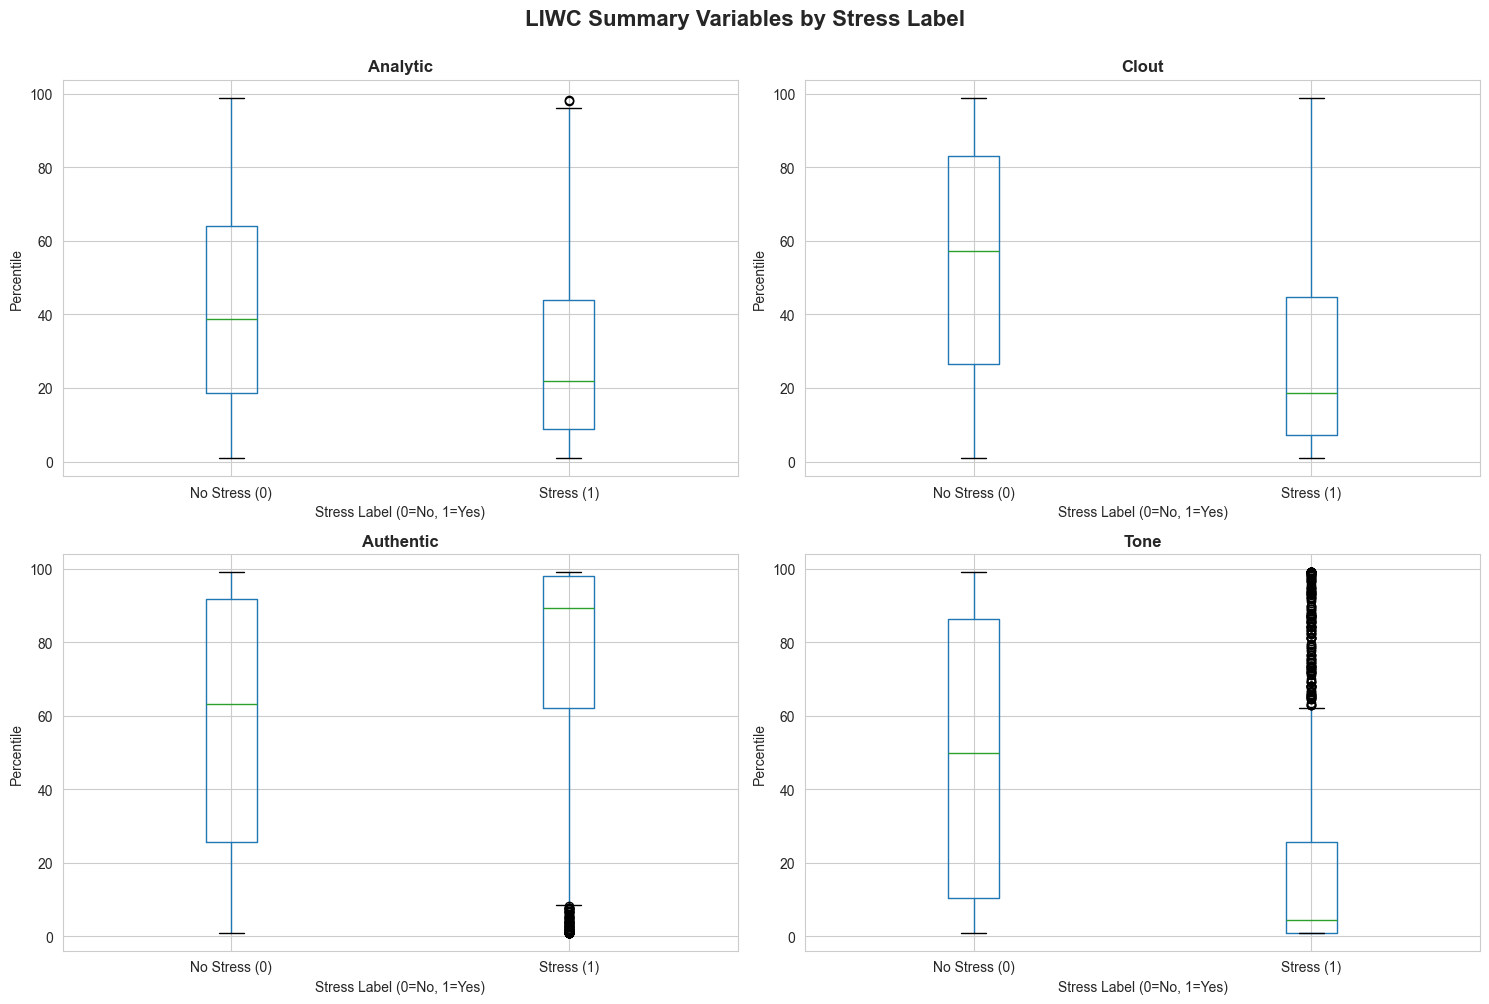

In [15]:
# Summary variables
summary_vars = ['lex_liwc_Analytic', 'lex_liwc_Clout', 'lex_liwc_Authentic', 'lex_liwc_Tone']

# Statistics by stress label
summary_stats = df_train.groupby('label')[summary_vars].mean()
print("LIWC Summary Variables by Stress Label:")
print(summary_stats)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, var in enumerate(summary_vars):
    df_train.boxplot(column=var, by='label', ax=axes[idx])
    axes[idx].set_title(f'{var.replace("lex_liwc_", "")}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Stress Label (0=No, 1=Yes)', fontsize=10)
    axes[idx].set_ylabel('Percentile', fontsize=10)
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['No Stress (0)', 'Stress (1)'])

plt.suptitle('LIWC Summary Variables by Stress Label', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

#### 4.2 Emotional and Affective Features


Emotional LIWC Features by Stress Label:
       lex_liwc_affect  lex_liwc_posemo  lex_liwc_negemo  lex_liwc_anx  \
label                                                                    
0             5.579644         3.419896         2.074133      0.513163   
1             6.567137         2.042789         4.421203      1.278038   

       lex_liwc_anger  lex_liwc_sad  
label                                
0            0.595830      0.373104  
1            1.230383      0.802903  


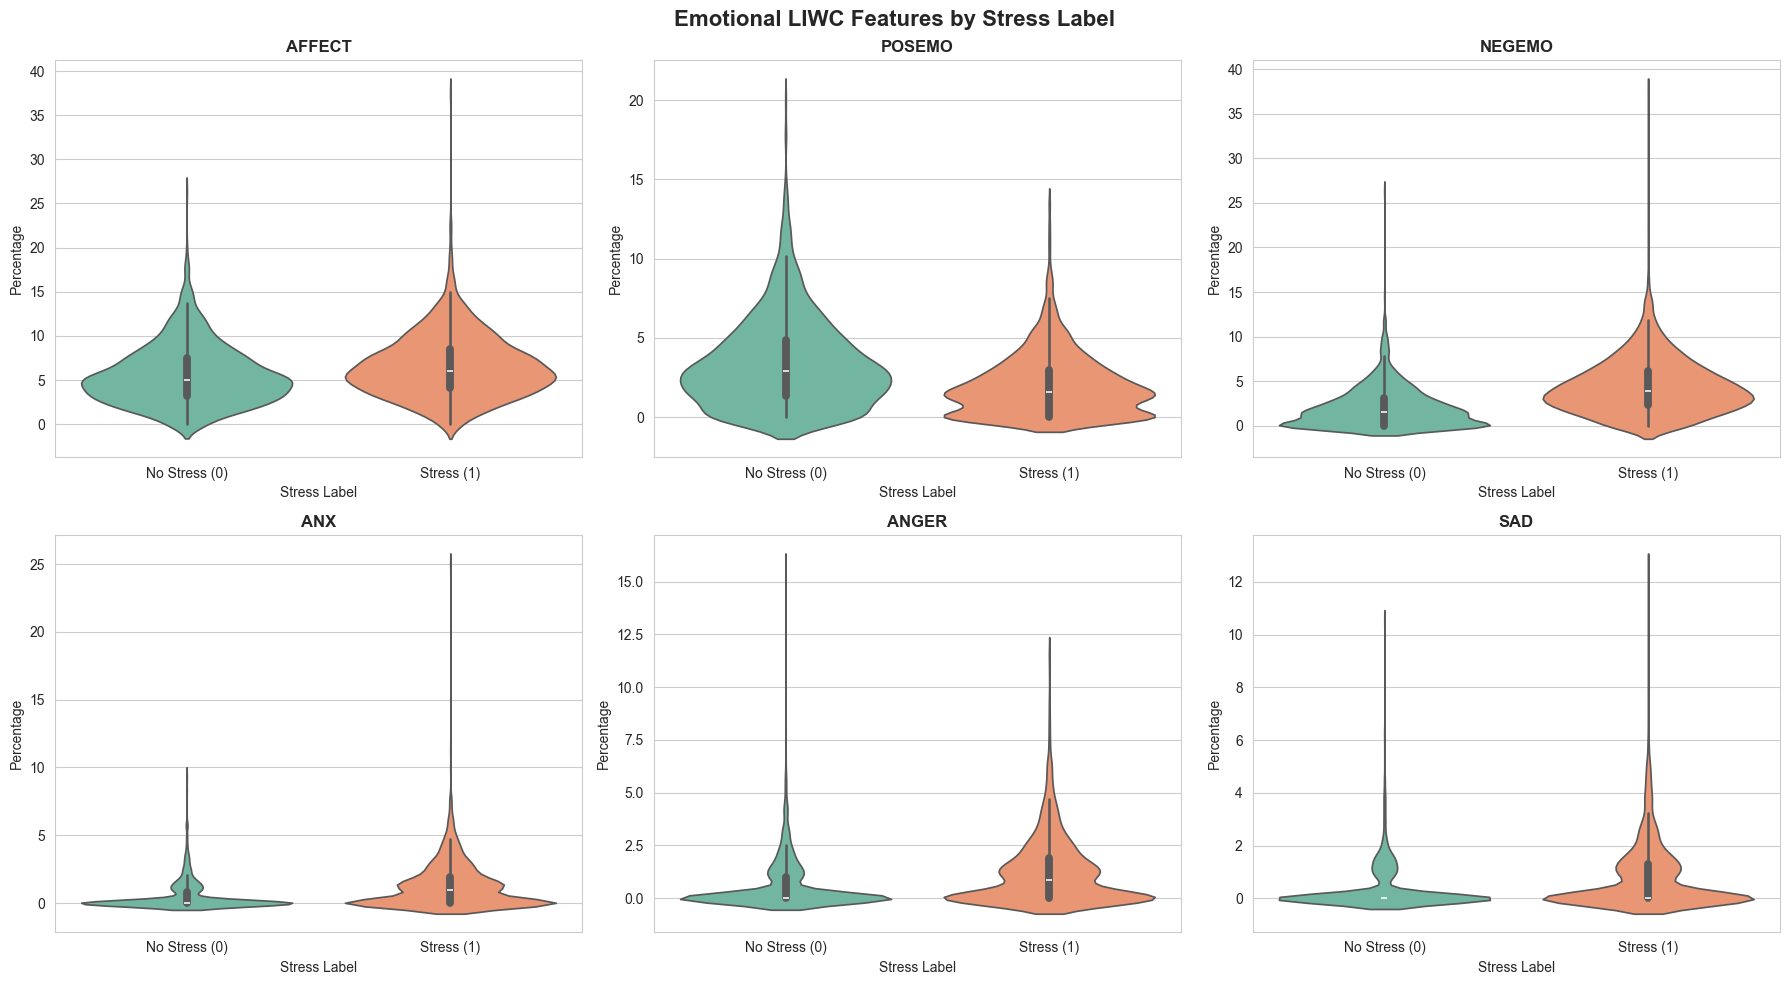

In [16]:
# Emotional features
emotion_vars = ['lex_liwc_affect', 'lex_liwc_posemo', 'lex_liwc_negemo', 
                'lex_liwc_anx', 'lex_liwc_anger', 'lex_liwc_sad']

# Statistics
emotion_stats = df_train.groupby('label')[emotion_vars].mean()
print("\nEmotional LIWC Features by Stress Label:")
print(emotion_stats)

# Visualize
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, var in enumerate(emotion_vars):
    # Violin plot for better distribution visualization
    sns.violinplot(data=df_train, x='label', y=var, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{var.replace("lex_liwc_", "").upper()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Stress Label', fontsize=10)
    axes[idx].set_ylabel('Percentage', fontsize=10)
    axes[idx].set_xticklabels(['No Stress (0)', 'Stress (1)'])

plt.suptitle('Emotional LIWC Features by Stress Label', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### 4.3 Pronoun Usage


Pronoun Usage by Stress Label:
       lex_liwc_pronoun  lex_liwc_i  lex_liwc_we  lex_liwc_you  \
label                                                            
0             18.679593    7.110022     0.997393      1.328933   
1             20.754892   10.841062     0.553548      0.445565   

       lex_liwc_shehe  lex_liwc_they  
label                                 
0            2.941941       0.666807  
1            2.495901       0.506331  


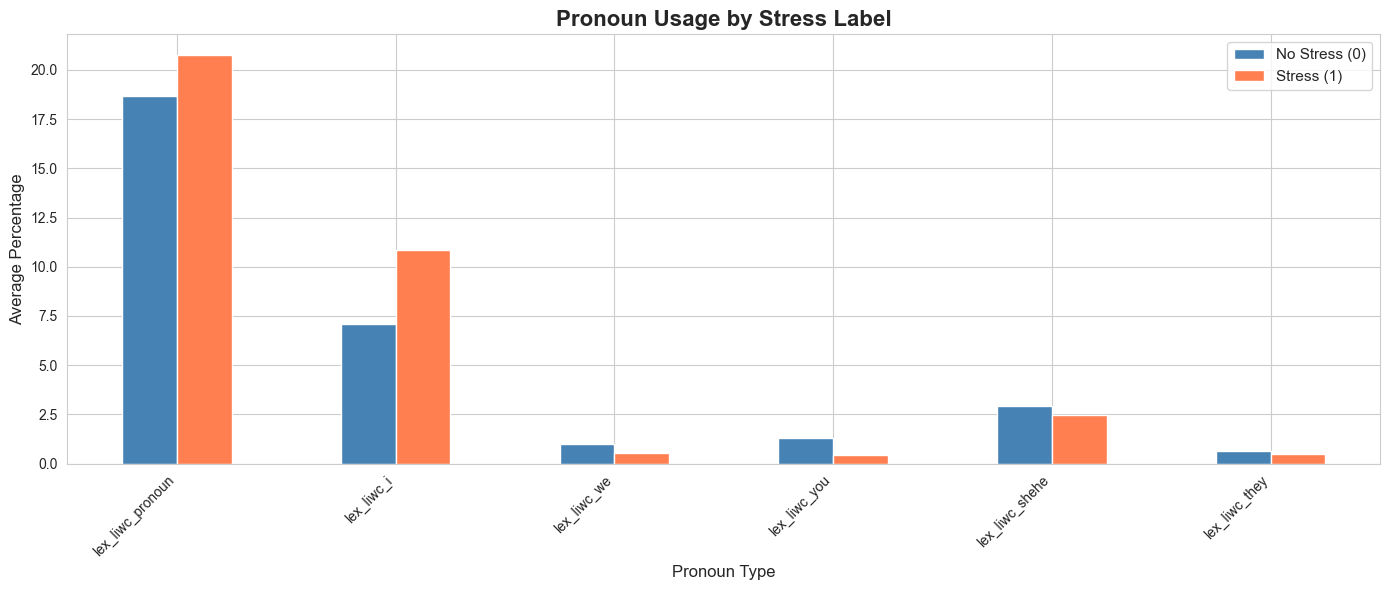

In [19]:
# Pronoun features
pronoun_vars = ['lex_liwc_pronoun', 'lex_liwc_i', 'lex_liwc_we', 
                'lex_liwc_you', 'lex_liwc_shehe', 'lex_liwc_they']

# Statistics
pronoun_stats = df_train.groupby('label')[pronoun_vars].mean()
print("\nPronoun Usage by Stress Label:")
print(pronoun_stats)

# Bar plot comparison
pronoun_stats.T.plot(kind='bar', figsize=(14, 6), color=['steelblue', 'coral'])
plt.title('Pronoun Usage by Stress Label', fontsize=16, fontweight='bold')
plt.xlabel('Pronoun Type', fontsize=12)
plt.ylabel('Average Percentage', fontsize=12)
plt.legend(['No Stress (0)', 'Stress (1)'], fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 4.4 Cognitive Process Features


Cognitive Process Features by Stress Label:
       lex_liwc_cogproc  lex_liwc_insight  lex_liwc_cause  lex_liwc_discrep  \
label                                                                         
0             13.048704          2.626148        1.543393          2.054985   
1             14.090558          3.062836        1.892513          1.849382   

       lex_liwc_tentat  lex_liwc_certain  
label                                     
0             3.378178          1.489756  
1             3.276290          1.593730  


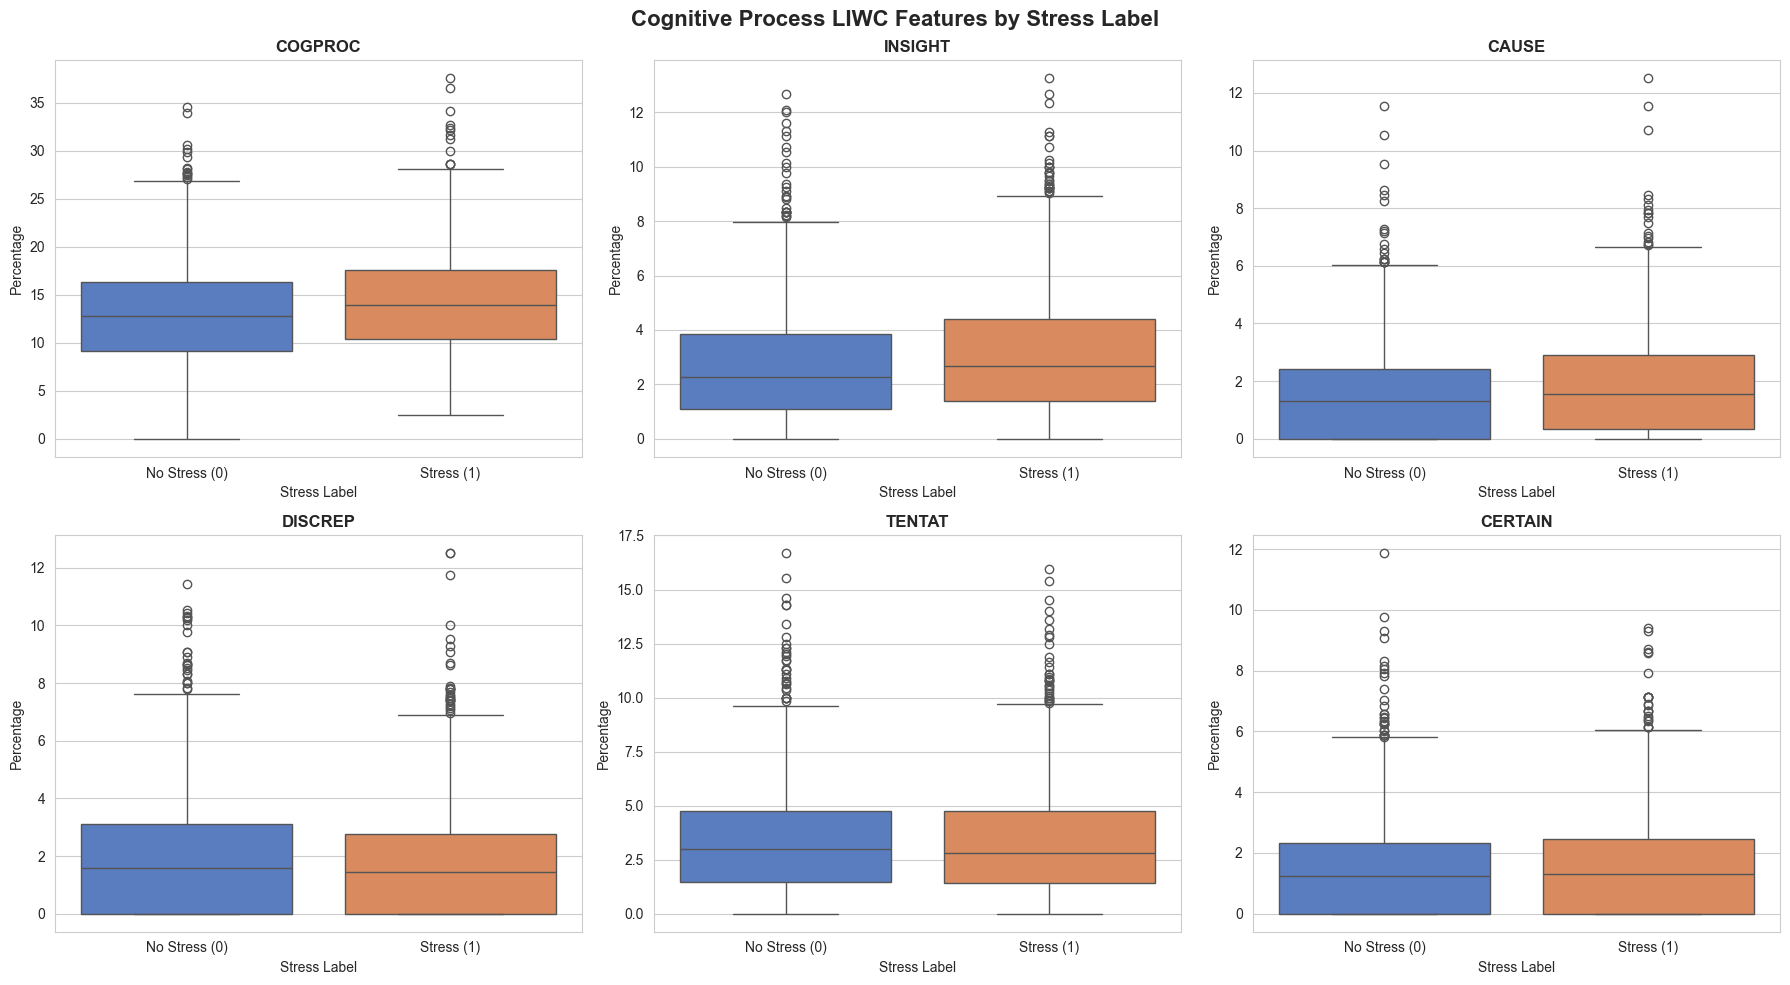

In [22]:
# Cognitive features
cognitive_vars = ['lex_liwc_cogproc', 'lex_liwc_insight', 'lex_liwc_cause', 
                  'lex_liwc_discrep', 'lex_liwc_tentat', 'lex_liwc_certain']

# Statistics
cognitive_stats = df_train.groupby('label')[cognitive_vars].mean()
print("\nCognitive Process Features by Stress Label:")
print(cognitive_stats)

# Visualize
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, var in enumerate(cognitive_vars):
    sns.boxplot(data=df_train, x='label', y=var, ax=axes[idx], palette='muted')
    axes[idx].set_title(f'{var.replace("lex_liwc_", "").upper()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Stress Label', fontsize=10)
    axes[idx].set_ylabel('Percentage', fontsize=10)
    axes[idx].set_xticklabels(['No Stress (0)', 'Stress (1)'])

plt.suptitle('Cognitive Process LIWC Features by Stress Label', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### 4.5 Time Orientation Features (Maybe remove)


Time Orientation by Stress Label:
       lex_liwc_focuspast  lex_liwc_focuspresent  lex_liwc_focusfuture
label                                                                 
0                5.306444              11.218681              1.277104
1                4.833669              13.326862              1.098145


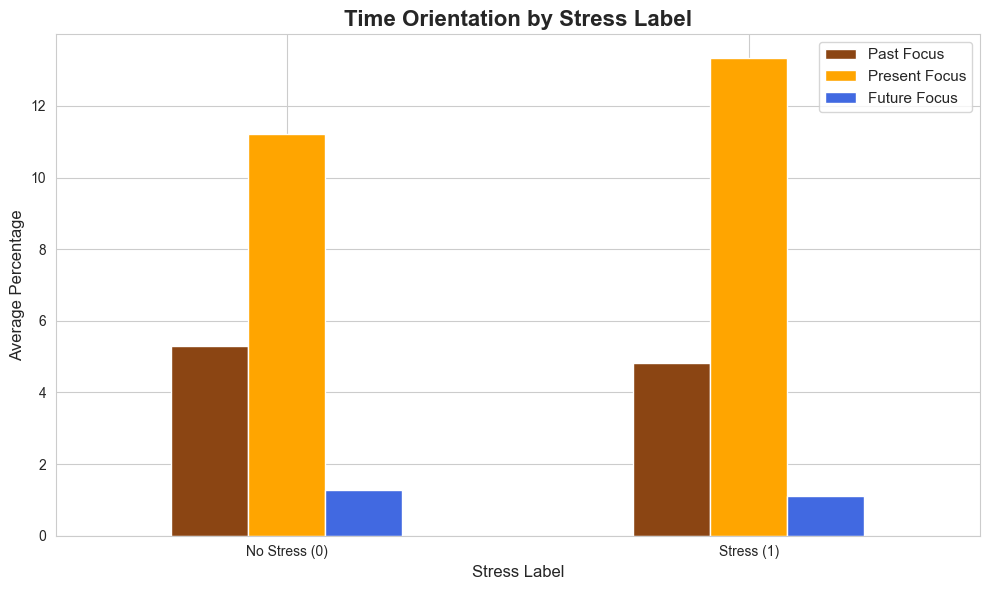

In [12]:
# Time orientation
time_vars = ['lex_liwc_focuspast', 'lex_liwc_focuspresent', 'lex_liwc_focusfuture']

# Statistics
time_stats = df.groupby('label')[time_vars].mean()
print("\nTime Orientation by Stress Label:")
print(time_stats)

# Stacked bar chart
time_stats.plot(kind='bar', stacked=False, figsize=(10, 6), color=['#8B4513', '#FFA500', '#4169E1'])
plt.title('Time Orientation by Stress Label', fontsize=16, fontweight='bold')
plt.xlabel('Stress Label', fontsize=12)
plt.ylabel('Average Percentage', fontsize=12)
plt.legend(['Past Focus', 'Present Focus', 'Future Focus'], fontsize=11)
plt.xticks([0, 1], ['No Stress (0)', 'Stress (1)'], rotation=0)
plt.tight_layout()
plt.show()

#### 4.5 Informal Language and Netspeak


Informal Language Features by Stress Label:
       lex_liwc_informal  lex_liwc_swear  lex_liwc_netspeak  lex_liwc_assent
label                                                                       
0               0.771815        0.119407           0.294881         0.134030
1               0.874503        0.361774           0.219200         0.105578


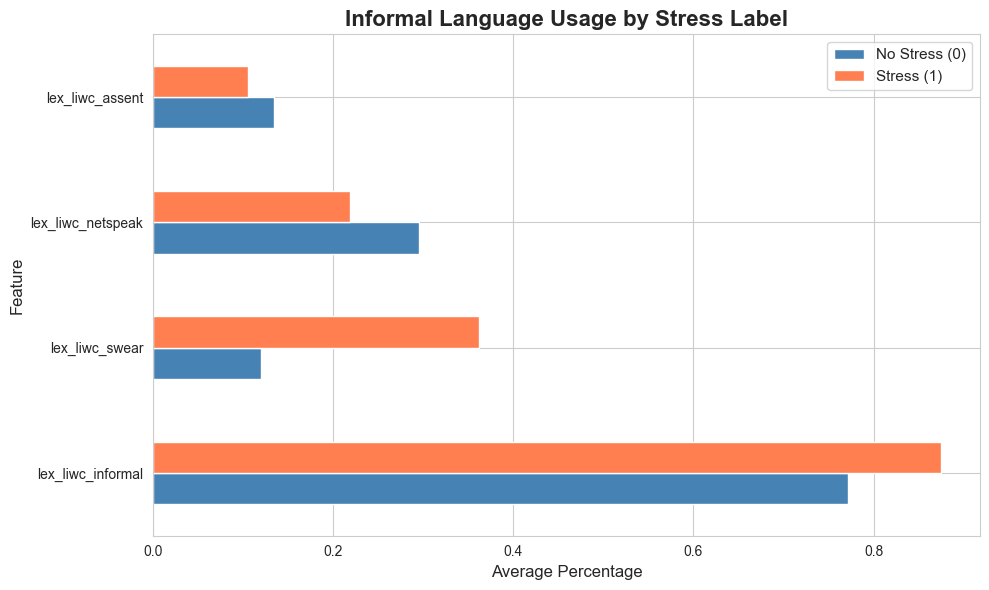

In [23]:
# Informal language features
informal_vars = ['lex_liwc_informal', 'lex_liwc_swear', 'lex_liwc_netspeak', 'lex_liwc_assent']

# Statistics
informal_stats = df_train.groupby('label')[informal_vars].mean()
print("\nInformal Language Features by Stress Label:")
print(informal_stats)

# Visualize
informal_stats.T.plot(kind='barh', figsize=(10, 6), color=['steelblue', 'coral'])
plt.title('Informal Language Usage by Stress Label', fontsize=16, fontweight='bold')
plt.xlabel('Average Percentage', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.legend(['No Stress (0)', 'Stress (1)'], fontsize=11)
plt.tight_layout()
plt.show()

### 5. DAL Features Exploration

DAL (Dictionary of Affect in Language) features measure emotional dimensions: pleasantness, activation, and imagery.

In [24]:
# Extract DAL columns
dal_cols = [col for col in df_train.columns if col.startswith('lex_dal_')]
print(f"Total DAL features: {len(dal_cols)}")
print(f"\nDAL features:")
print(dal_cols)

Total DAL features: 9

DAL features:
['lex_dal_max_pleasantness', 'lex_dal_max_activation', 'lex_dal_max_imagery', 'lex_dal_min_pleasantness', 'lex_dal_min_activation', 'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery', 'lex_dal_avg_pleasantness']


#### 5.1 DAL Values range
DAL Feature Values range from 1 - 3

In [28]:
# DAL value range
dal_ranges = df_train[dal_cols].agg(['min', 'max'])
print("\nDAL feature value ranges:")
print(dal_ranges)


DAL feature value ranges:
     lex_dal_max_pleasantness  lex_dal_max_activation  lex_dal_max_imagery  \
min                       2.0                  1.8571                  2.0   
max                       3.0                  3.0000                  3.0   

     lex_dal_min_pleasantness  lex_dal_min_activation  lex_dal_min_imagery  \
min                       1.0                     1.0                  1.0   
max                       1.9                     1.5                  1.2   

     lex_dal_avg_activation  lex_dal_avg_imagery  lex_dal_avg_pleasantness  
min                  1.4854              1.20000                   1.56115  
max                  2.0074              2.06667                   2.15849  


#### 5.2 DAL Statistics by Stress Label

In [25]:
# DAL statistics
dal_stats = df_train.groupby('label')[dal_cols].mean()
print("DAL Features by Stress Label:")
print(dal_stats.T)

# Calculate difference
dal_diff = dal_stats.loc[1] - dal_stats.loc[0]
dal_diff = dal_diff.sort_values(ascending=False)
print("\nDifference (Stress - No Stress):")
print(dal_diff)

DAL Features by Stress Label:
label                            0         1
lex_dal_max_pleasantness  2.808996  2.786047
lex_dal_max_activation    2.680927  2.726727
lex_dal_max_imagery       2.943407  2.952957
lex_dal_min_pleasantness  1.124580  1.054814
lex_dal_min_activation    1.123020  1.117448
lex_dal_min_imagery       1.000296  1.000134
lex_dal_avg_activation    1.715480  1.729363
lex_dal_avg_imagery       1.541778  1.531520
lex_dal_avg_pleasantness  1.889621  1.870099

Difference (Stress - No Stress):
lex_dal_max_activation      0.045800
lex_dal_avg_activation      0.013883
lex_dal_max_imagery         0.009550
lex_dal_min_imagery        -0.000162
lex_dal_min_activation     -0.005572
lex_dal_avg_imagery        -0.010257
lex_dal_avg_pleasantness   -0.019523
lex_dal_max_pleasantness   -0.022949
lex_dal_min_pleasantness   -0.069766
dtype: float64


#### 5.2 DAL Distribution Visualization (Maybe remove)

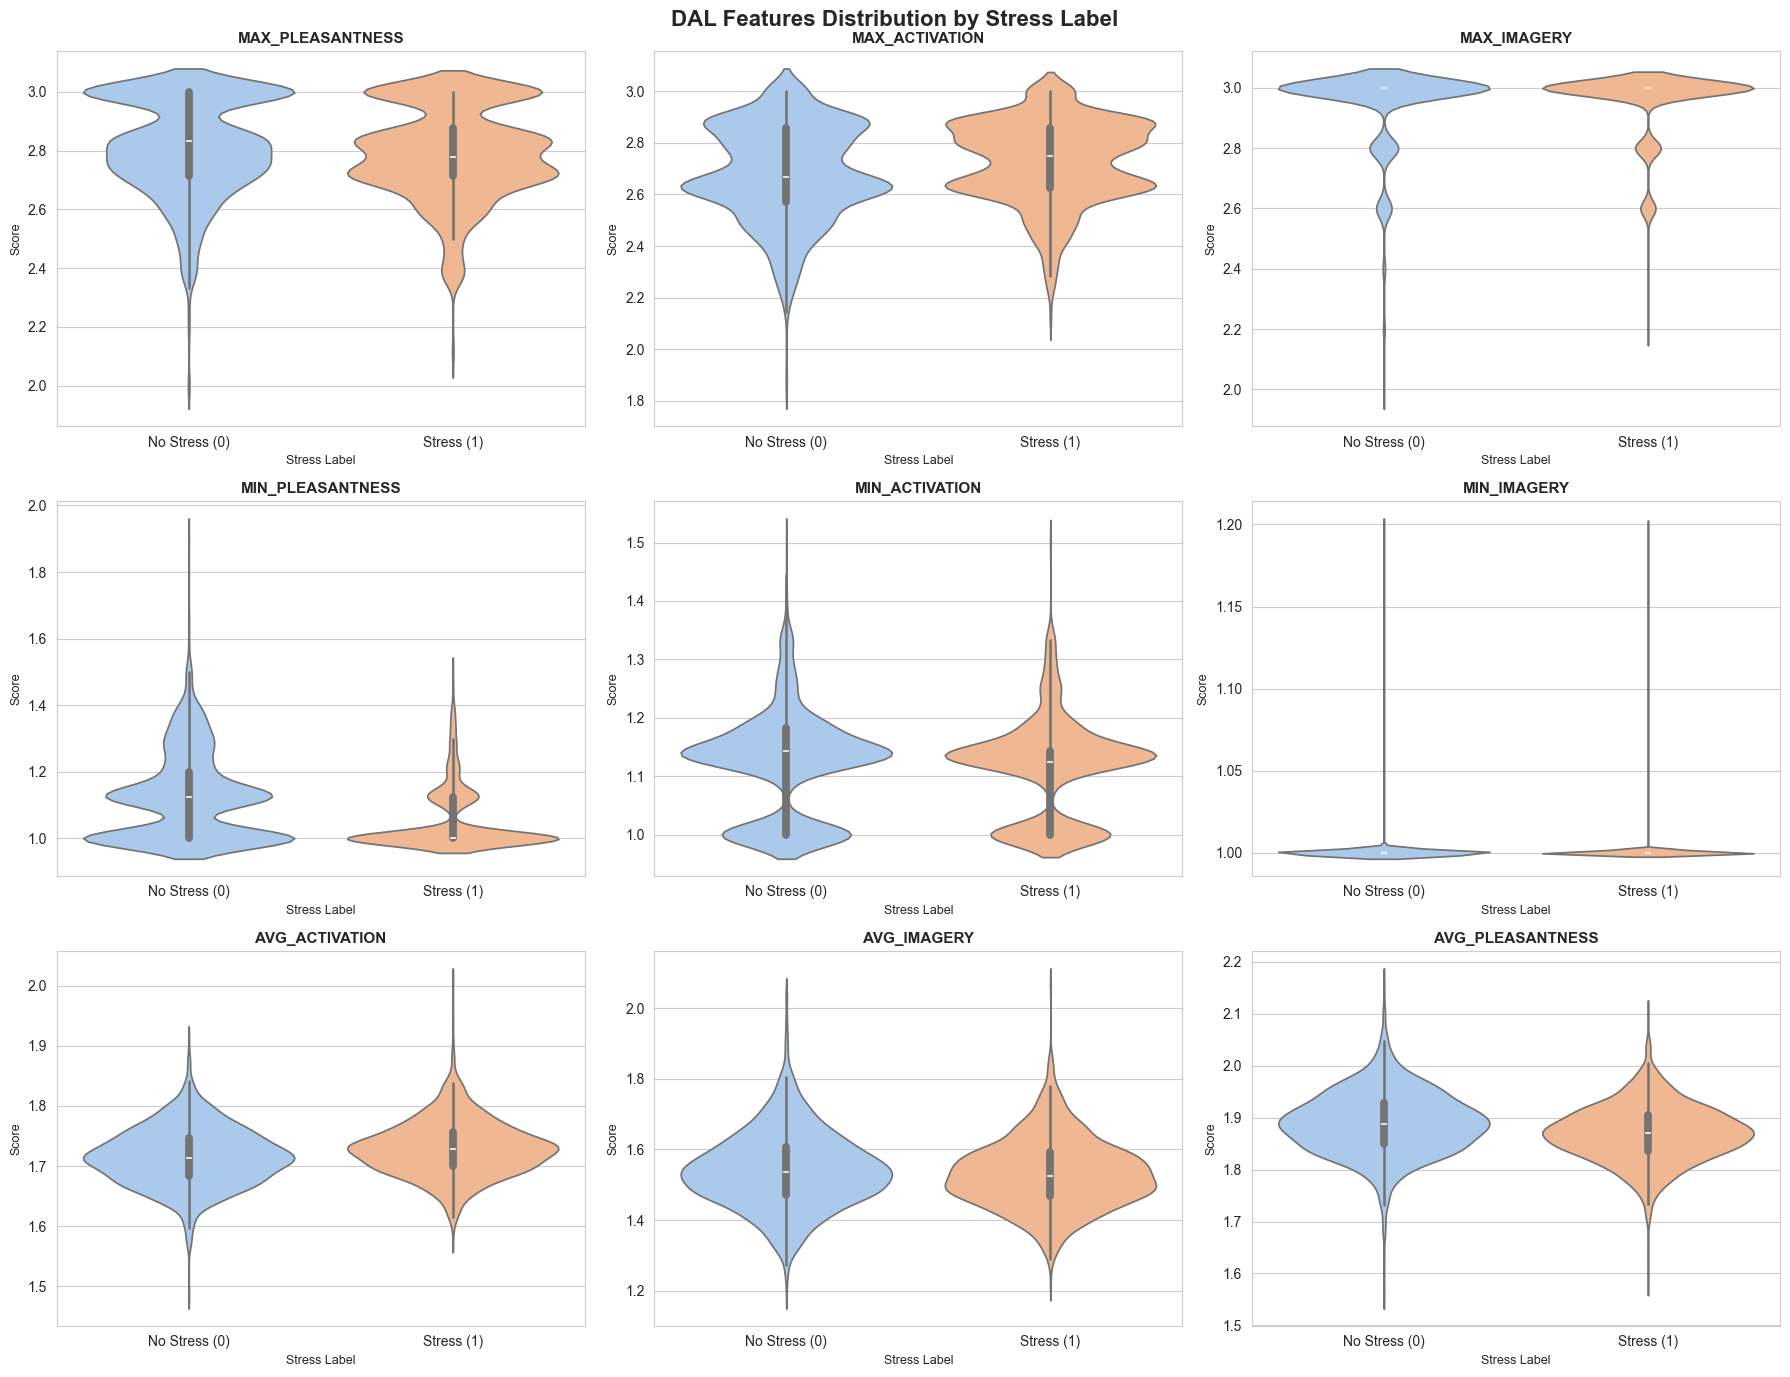

In [26]:
# Visualize all DAL features
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for idx, col in enumerate(dal_cols):
    sns.violinplot(data=df_train, x='label', y=col, ax=axes[idx], palette='pastel')
    axes[idx].set_title(f'{col.replace("lex_dal_", "").upper()}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Stress Label', fontsize=9)
    axes[idx].set_ylabel('Score', fontsize=9)
    axes[idx].set_xticklabels(['No Stress (0)', 'Stress (1)'])

plt.suptitle('DAL Features Distribution by Stress Label', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### 5.3 Average DAL Dimensions Comparison


Average DAL Dimensions by Stress Label:
       lex_dal_avg_pleasantness  lex_dal_avg_activation  lex_dal_avg_imagery
label                                                                       
0                      1.889621                1.715480             1.541778
1                      1.870099                1.729363             1.531520


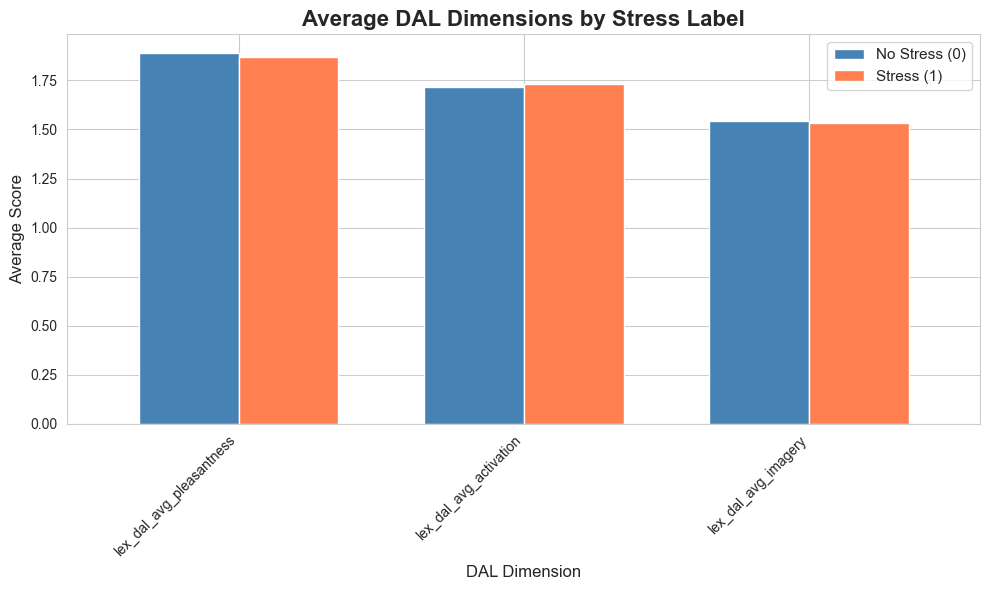

In [27]:
# Focus on average dimensions
avg_dal = ['lex_dal_avg_pleasantness', 'lex_dal_avg_activation', 'lex_dal_avg_imagery']

# Statistics
avg_dal_stats = df_train.groupby('label')[avg_dal].mean()
print("\nAverage DAL Dimensions by Stress Label:")
print(avg_dal_stats)

# Bar plot
avg_dal_stats.T.plot(kind='bar', figsize=(10, 6), color=['steelblue', 'coral'], width=0.7)
plt.title('Average DAL Dimensions by Stress Label', fontsize=16, fontweight='bold')
plt.xlabel('DAL Dimension', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.legend(['No Stress (0)', 'Stress (1)'], fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 5.4 DAL Scatter Plots: Relationships (Maybe remove)

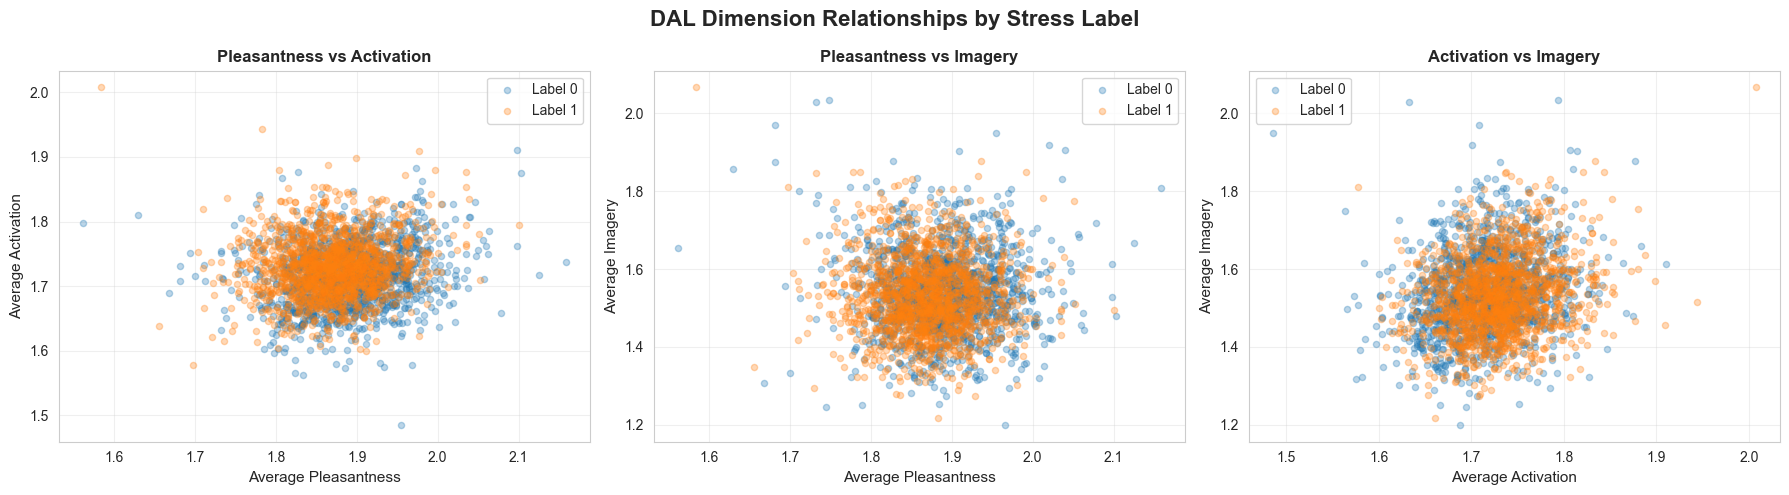

In [29]:
# Scatter plots to see relationships
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Pleasantness vs Activation
for label in [0, 1]:
    data = df_train[df_train['label'] == label]
    axes[0].scatter(data['lex_dal_avg_pleasantness'], data['lex_dal_avg_activation'], 
                   alpha=0.3, label=f'Label {label}', s=20)
axes[0].set_xlabel('Average Pleasantness', fontsize=11)
axes[0].set_ylabel('Average Activation', fontsize=11)
axes[0].set_title('Pleasantness vs Activation', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Pleasantness vs Imagery
for label in [0, 1]:
    data = df_train[df_train['label'] == label]
    axes[1].scatter(data['lex_dal_avg_pleasantness'], data['lex_dal_avg_imagery'], 
                   alpha=0.3, label=f'Label {label}', s=20)
axes[1].set_xlabel('Average Pleasantness', fontsize=11)
axes[1].set_ylabel('Average Imagery', fontsize=11)
axes[1].set_title('Pleasantness vs Imagery', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Activation vs Imagery
for label in [0, 1]:
    data = df_train[df_train['label'] == label]
    axes[2].scatter(data['lex_dal_avg_activation'], data['lex_dal_avg_imagery'], 
                   alpha=0.3, label=f'Label {label}', s=20)
axes[2].set_xlabel('Average Activation', fontsize=11)
axes[2].set_ylabel('Average Imagery', fontsize=11)
axes[2].set_title('Activation vs Imagery', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.suptitle('DAL Dimension Relationships by Stress Label', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 6. Correlation Analysis

#### 6.1 Top LIWC Features Correlated with Stress

In [30]:
# Calculate correlation with label
liwc_corr = df_train[liwc_cols].corrwith(df_train['label']).sort_values(ascending=False)

print("Top 20 LIWC features most positively correlated with stress:")
print(liwc_corr.head(20))
print("\nTop 20 LIWC features most negatively correlated with stress:")
print(liwc_corr.tail(20))

Top 20 LIWC features most positively correlated with stress:
lex_liwc_i               0.400440
lex_liwc_negemo          0.387979
lex_liwc_Authentic       0.275282
lex_liwc_anx             0.260146
lex_liwc_Dic             0.241536
lex_liwc_function        0.236932
lex_liwc_anger           0.218990
lex_liwc_feel            0.198048
lex_liwc_sad             0.196268
lex_liwc_Apostro         0.187498
lex_liwc_ppron           0.187372
lex_liwc_focuspresent    0.186910
lex_liwc_negate          0.186769
lex_liwc_pronoun         0.185846
lex_liwc_risk            0.178752
lex_liwc_adverb          0.176623
lex_liwc_swear           0.162759
lex_liwc_verb            0.144836
lex_liwc_affect          0.139692
lex_liwc_conj            0.132933
dtype: float64

Top 20 LIWC features most negatively correlated with stress:
lex_liwc_Exclam        -0.084096
lex_liwc_Sixltr        -0.085978
lex_liwc_AllPunc       -0.087011
lex_liwc_see           -0.090395
lex_liwc_quant         -0.093486
lex_liwc_drives  

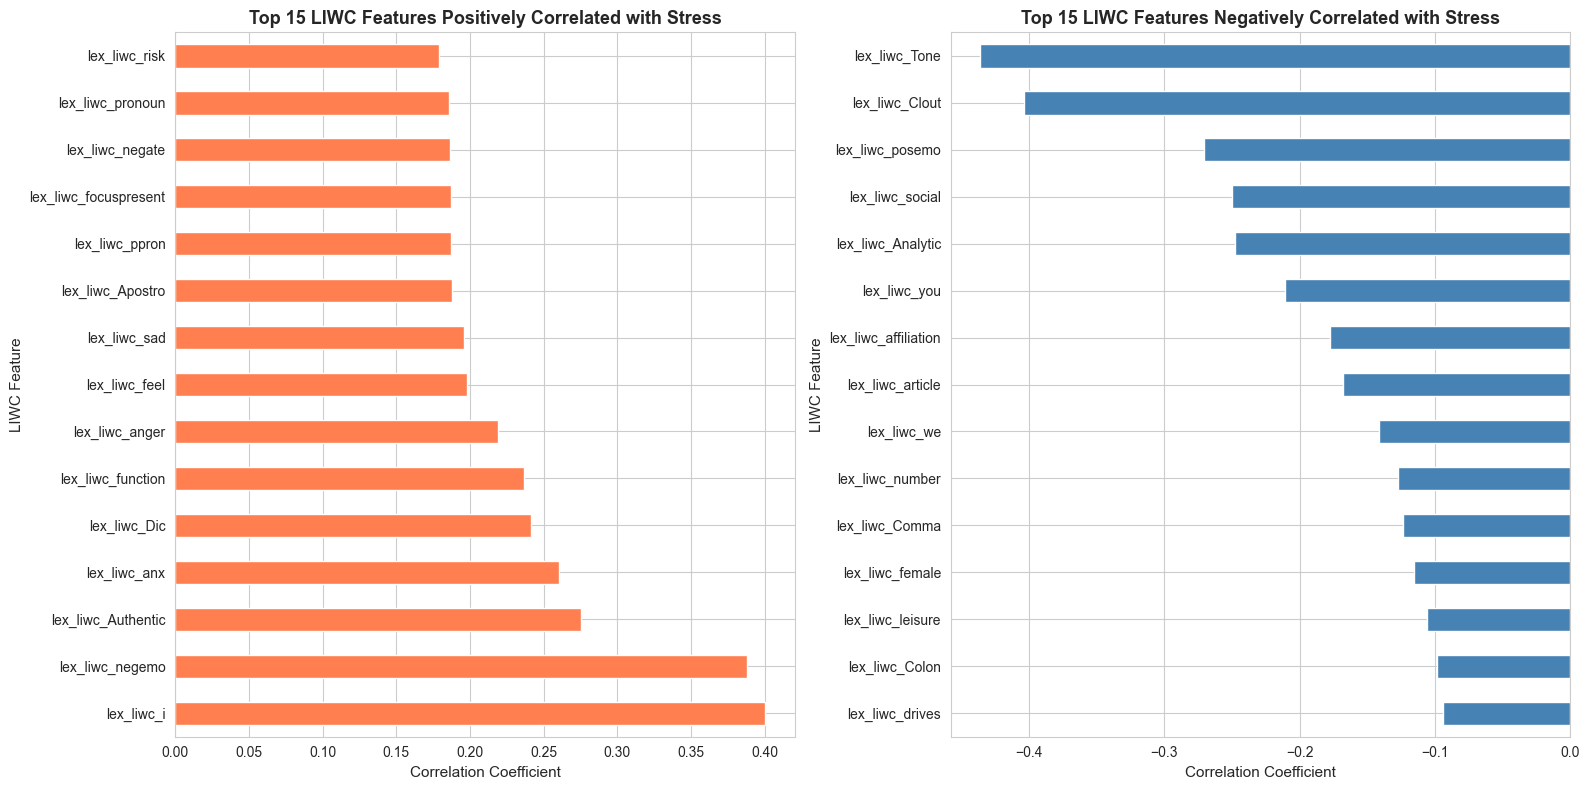

In [20]:
# Visualize top correlations
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Top positive
liwc_corr.head(15).plot(kind='barh', ax=axes[0], color='coral')
axes[0].set_title('Top 15 LIWC Features Positively Correlated with Stress', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Correlation Coefficient', fontsize=11)
axes[0].set_ylabel('LIWC Feature', fontsize=11)

# Top negative
liwc_corr.tail(15).plot(kind='barh', ax=axes[1], color='steelblue')
axes[1].set_title('Top 15 LIWC Features Negatively Correlated with Stress', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Correlation Coefficient', fontsize=11)
axes[1].set_ylabel('LIWC Feature', fontsize=11)

plt.tight_layout()
plt.show()

#### 6.2 DAL Features Correlation with Stress

DAL features correlation with stress:
lex_dal_avg_activation      0.144963
lex_dal_max_activation      0.131128
lex_dal_max_imagery         0.037904
lex_dal_min_imagery        -0.012440
lex_dal_min_activation     -0.032659
lex_dal_avg_imagery        -0.049756
lex_dal_max_pleasantness   -0.070477
lex_dal_avg_pleasantness   -0.165470
lex_dal_min_pleasantness   -0.297439
dtype: float64


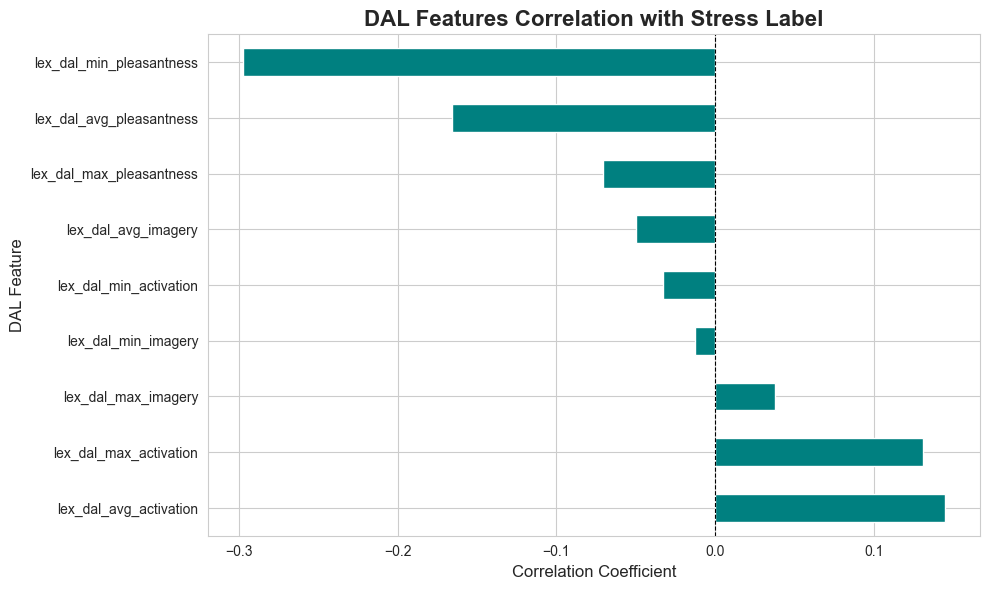

In [31]:
# DAL correlation with label
dal_corr = df_train[dal_cols].corrwith(df_train['label']).sort_values(ascending=False)

print("DAL features correlation with stress:")
print(dal_corr)

# Visualize
dal_corr.plot(kind='barh', figsize=(10, 6), color='teal')
plt.title('DAL Features Correlation with Stress Label', fontsize=16, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('DAL Feature', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

#### 6.3 Correlation Heatmap of a couple Features

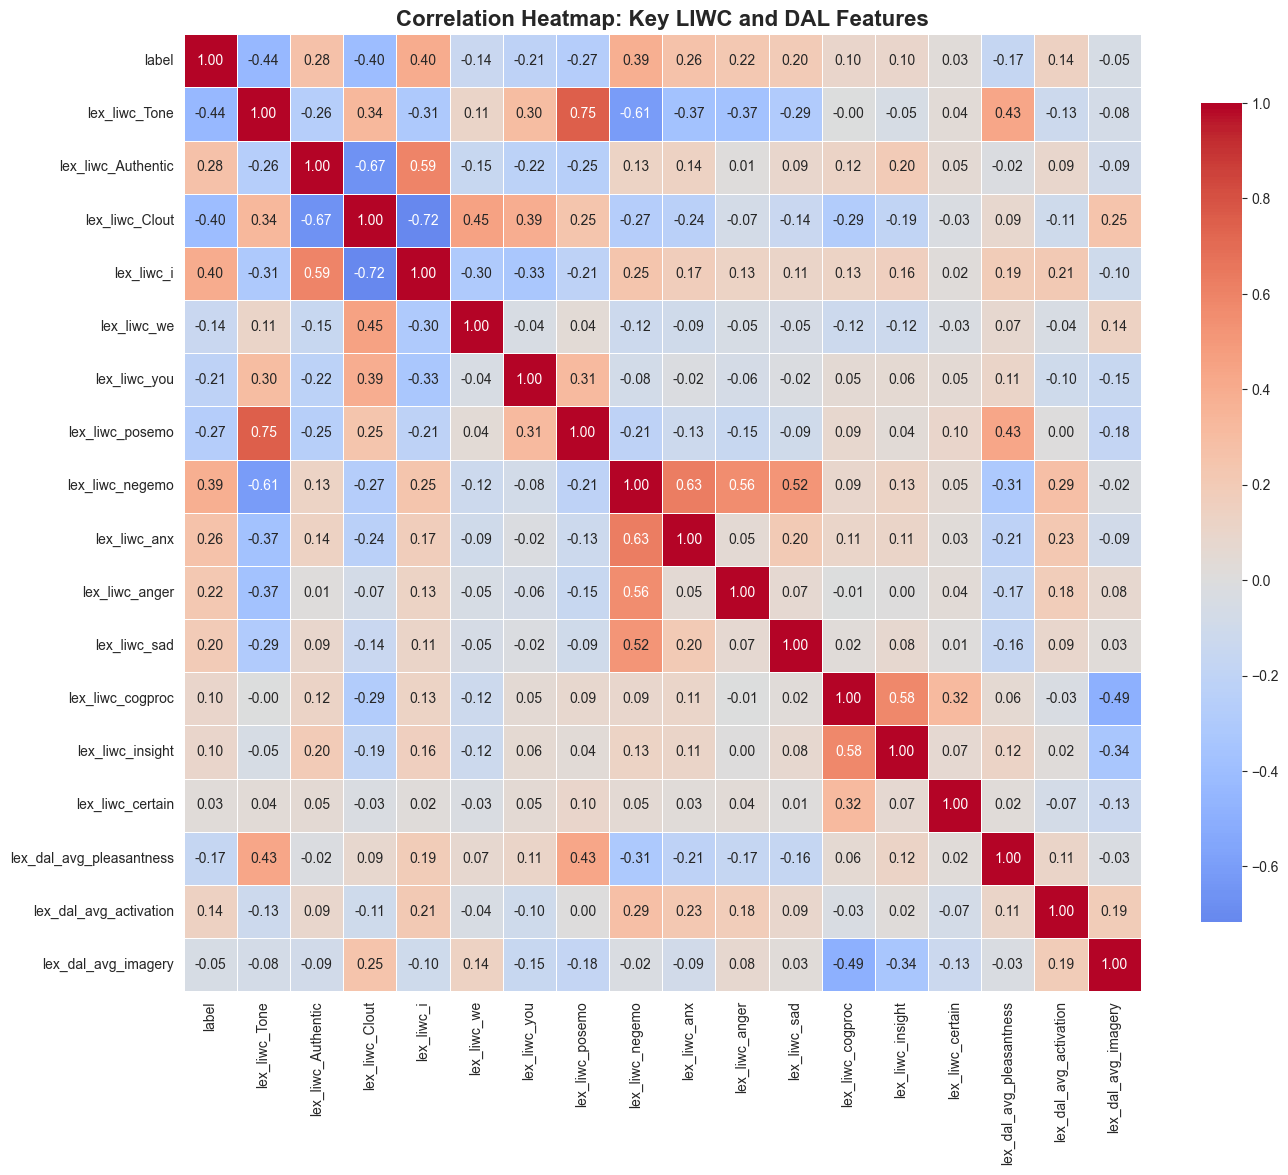

In [33]:
# Select features for heatmap
features = [
    'label',
    'lex_liwc_Tone', 'lex_liwc_Authentic', 'lex_liwc_Clout',
    'lex_liwc_i', 'lex_liwc_we', 'lex_liwc_you',
    'lex_liwc_posemo', 'lex_liwc_negemo', 'lex_liwc_anx', 'lex_liwc_anger', 'lex_liwc_sad',
    'lex_liwc_cogproc', 'lex_liwc_insight', 'lex_liwc_certain',
    'lex_dal_avg_pleasantness', 'lex_dal_avg_activation', 'lex_dal_avg_imagery'
]

# Compute correlation matrix
corr_matrix = df_train[features].corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap: Key LIWC and DAL Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 7. Statistical Testing (to remove)

In [34]:
# T-tests for key features
from scipy.stats import ttest_ind

test_features = [
    'lex_liwc_i', 'lex_liwc_negemo', 'lex_liwc_anx', 'lex_liwc_anger',
    'lex_liwc_Tone', 'lex_dal_avg_pleasantness', 'lex_dal_avg_activation'
]

print("T-test results (comparing stress vs no-stress groups):\n")
print(f"{'Feature':<35} {'Mean (No Stress)':<20} {'Mean (Stress)':<20} {'t-statistic':<15} {'p-value'}")
print("-" * 110)

results = []
for feature in test_features:
    no_stress = df_train[df_train['label'] == 0][feature]
    stress = df_train[df_train['label'] == 1][feature]
    
    t_stat, p_val = ttest_ind(no_stress, stress, nan_policy='omit')
    
    mean_no_stress = no_stress.mean()
    mean_stress = stress.mean()
    
    print(f"{feature:<35} {mean_no_stress:<20.4f} {mean_stress:<20.4f} {t_stat:<15.4f} {p_val:.4e}")
    
    results.append({
        'feature': feature,
        'mean_no_stress': mean_no_stress,
        'mean_stress': mean_stress,
        't_statistic': t_stat,
        'p_value': p_val,
        'significant': p_val < 0.05
    })

results_df = pd.DataFrame(results)
print(f"\n\nSignificant features (p < 0.05): {results_df['significant'].sum()}/{len(results_df)}")

T-test results (comparing stress vs no-stress groups):

Feature                             Mean (No Stress)     Mean (Stress)        t-statistic     p-value
--------------------------------------------------------------------------------------------------------------
lex_liwc_i                          7.1100               10.8411              -23.2724        8.7513e-110
lex_liwc_negemo                     2.0741               4.4212               -22.4175        1.3169e-102
lex_liwc_anx                        0.5132               1.2780               -14.3479        4.0179e-45
lex_liwc_anger                      0.5958               1.2304               -11.9523        3.6923e-32
lex_liwc_Tone                       49.5997              18.7564              25.8005         4.9093e-132
lex_dal_avg_pleasantness            1.8896               1.8701               8.9351          7.1569e-19
lex_dal_avg_activation              1.7155               1.7294               -7.8023         8.47

### 8. Text Length and Social Features
Insights into text feature will be usefull for transformer models and TF-IDF

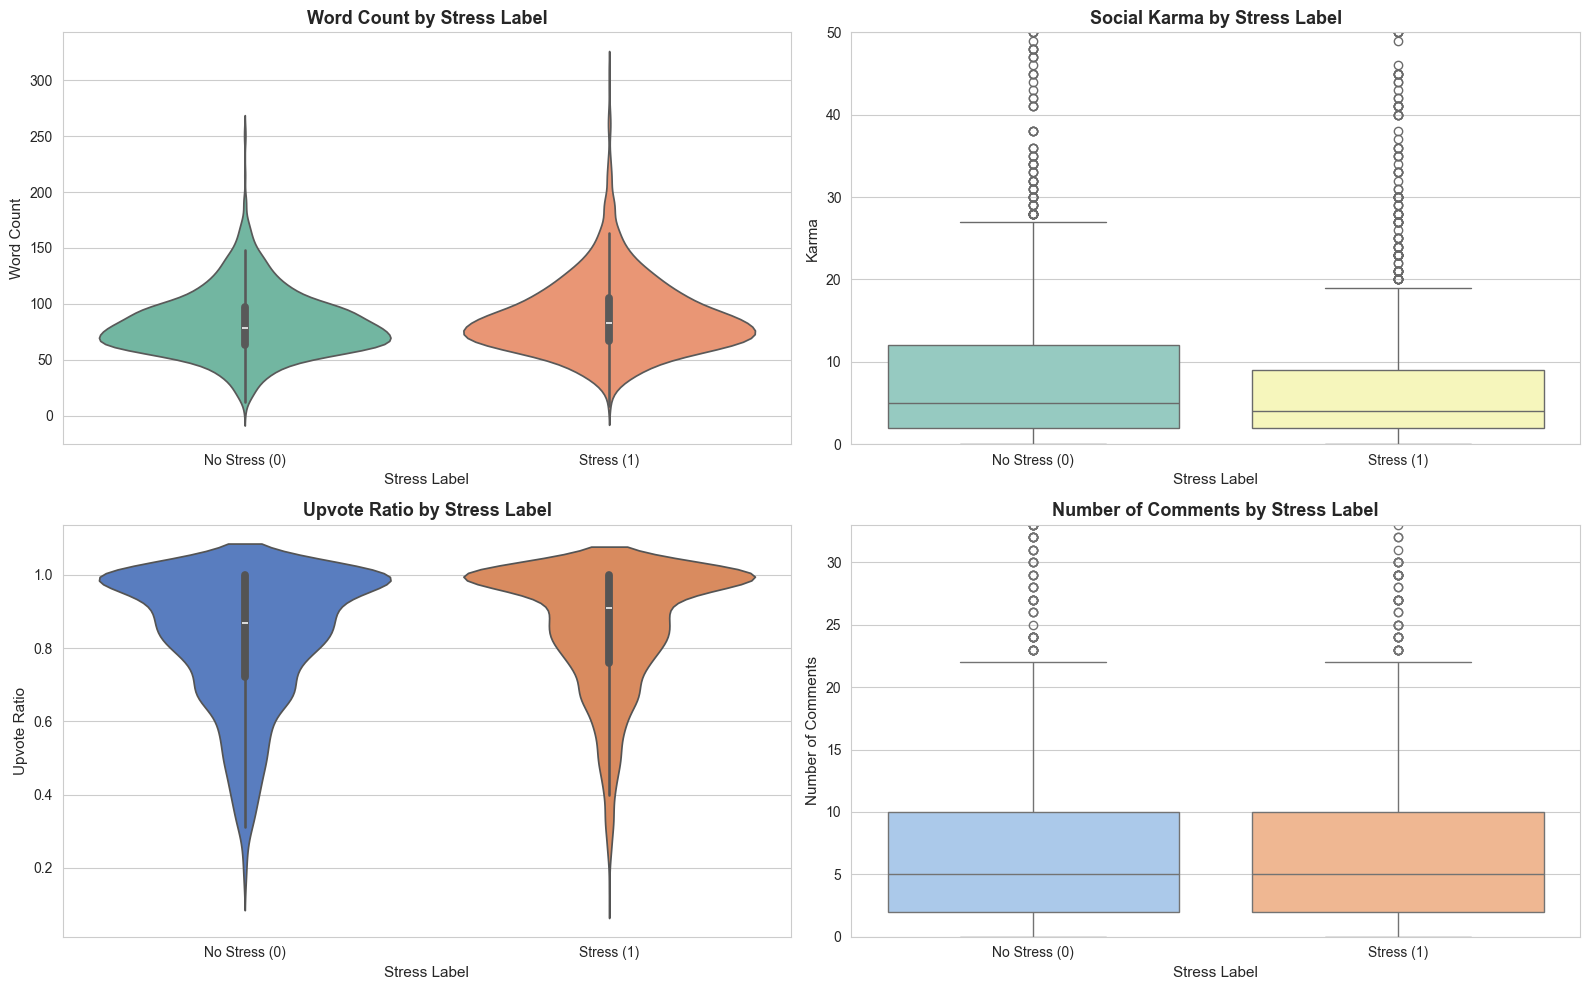


Social and Text Features by Stress Label:
       lex_liwc_WC  social_karma  social_upvote_ratio  social_num_comments
label                                                                     
0        82.585926     22.715556             0.825696            10.829630
1        89.090054     14.221774             0.859684             9.149194


In [40]:
# Analyze word count and social features
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Word count
sns.violinplot(data=df_train, x='label', y='lex_liwc_WC', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Word Count by Stress Label', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Stress Label', fontsize=11)
axes[0, 0].set_ylabel('Word Count', fontsize=11)
axes[0, 0].set_xticklabels(['No Stress (0)', 'Stress (1)'])

# Karma
sns.boxplot(data=df_train, x='label', y='social_karma', ax=axes[0, 1], palette='Set3')
axes[0, 1].set_title('Social Karma by Stress Label', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Stress Label', fontsize=11)
axes[0, 1].set_ylabel('Karma', fontsize=11)
axes[0, 1].set_xticklabels(['No Stress (0)', 'Stress (1)'])
axes[0, 1].set_ylim([0, df_train['social_karma'].quantile(0.95)])  # Remove outliers for clarity

# Upvote ratio
sns.violinplot(data=df_train, x='label', y='social_upvote_ratio', ax=axes[1, 0], palette='muted')
axes[1, 0].set_title('Upvote Ratio by Stress Label', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Stress Label', fontsize=11)
axes[1, 0].set_ylabel('Upvote Ratio', fontsize=11)
axes[1, 0].set_xticklabels(['No Stress (0)', 'Stress (1)'])

# Number of comments
sns.boxplot(data=df_train, x='label', y='social_num_comments', ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Number of Comments by Stress Label', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Stress Label', fontsize=11)
axes[1, 1].set_ylabel('Number of Comments', fontsize=11)
axes[1, 1].set_xticklabels(['No Stress (0)', 'Stress (1)'])
axes[1, 1].set_ylim([0, df_train['social_num_comments'].quantile(0.95)])  # Remove outliers for clarity

plt.tight_layout()
plt.show()

# Statistics
social_features = ['lex_liwc_WC', 'social_karma', 'social_upvote_ratio', 'social_num_comments']
social_stats = df_train.groupby('label')[social_features].mean()
print("\nSocial and Text Features by Stress Label:")
print(social_stats)

### 9. Summary and Key Insights

In [37]:
print("="*80)
print("KEY INSIGHTS FROM EXPLORATORY ANALYSIS")
print("="*80)

print("\n1. LIWC FEATURES:")
print("-" * 80)
print("   - First-person singular pronouns ('I') are more common in stressed posts")
print("   - Negative emotions (anxiety, anger, sadness) are higher in stressed posts")
print("   - Positive emotions are lower in stressed posts")
print("   - Tone scores are generally lower for stressed content")
print("   - Cognitive process words show differences in insight and certainty")

print("\n2. DAL FEATURES:")
print("-" * 80)
print("   - Pleasantness: Lower in stressed posts (more negative affect)")
print("   - Activation: May vary depending on the type of stress")
print("   - Imagery: Differences in how vividly emotions are expressed")

print("\n3. SUBREDDIT PATTERNS:")
print("-" * 80)
subreddit_stress = df_train.groupby('subreddit')['label'].mean().sort_values(ascending=False)
print(f"   - Highest stress rate: {subreddit_stress.index[0]} ({subreddit_stress.iloc[0]*100:.1f}%)")
print(f"   - Lowest stress rate: {subreddit_stress.index[-1]} ({subreddit_stress.iloc[-1]*100:.1f}%)")

print("\n4. TOP PREDICTIVE FEATURES:")
print("-" * 80)
all_features = liwc_cols + dal_cols
all_corr = df_train[all_features].corrwith(df_train['label']).abs().sort_values(ascending=False)
print("   Top 10 features by absolute correlation:")
for i, (feat, corr) in enumerate(all_corr.head(10).items(), 1):
    print(f"   {i:2d}. {feat:<40} {corr:>6.4f}")

""" print("\n" + "="*80)
print("RECOMMENDATIONS FOR MODELING:")
print("="*80)
print("   1. Focus on emotional and affective features (LIWC affect, DAL pleasantness)")
print("   2. Include pronoun usage patterns (especially first-person)")
print("   3. Consider cognitive process features for interpretability")
print("   4. Account for subreddit as a categorical feature")
print("   5. Handle class imbalance in the dataset")
print("   6. Consider feature engineering combining LIWC and DAL")
print("="*80) """

KEY INSIGHTS FROM EXPLORATORY ANALYSIS

1. LIWC FEATURES:
--------------------------------------------------------------------------------
   - First-person singular pronouns ('I') are more common in stressed posts
   - Negative emotions (anxiety, anger, sadness) are higher in stressed posts
   - Positive emotions are lower in stressed posts
   - Tone scores are generally lower for stressed content
   - Cognitive process words show differences in insight and certainty

2. DAL FEATURES:
--------------------------------------------------------------------------------
   - Pleasantness: Lower in stressed posts (more negative affect)
   - Activation: May vary depending on the type of stress
   - Imagery: Differences in how vividly emotions are expressed

3. SUBREDDIT PATTERNS:
--------------------------------------------------------------------------------
   - Highest stress rate: anxiety (65.8%)
   - Lowest stress rate: assistance (36.3%)

4. TOP PREDICTIVE FEATURES:
--------------------

' print("\n" + "="*80)\nprint("RECOMMENDATIONS FOR MODELING:")\nprint("="*80)\nprint("   1. Focus on emotional and affective features (LIWC affect, DAL pleasantness)")\nprint("   2. Include pronoun usage patterns (especially first-person)")\nprint("   3. Consider cognitive process features for interpretability")\nprint("   4. Account for subreddit as a categorical feature")\nprint("   5. Handle class imbalance in the dataset")\nprint("   6. Consider feature engineering combining LIWC and DAL")\nprint("="*80) '

## Data Processing